# Tech interview

## Part 1

### Experimental design


I would use an A/B-Testing to analyse the impact of professional photos on the booking. 
- Hypthesis Testing: Is there a significant difference of the views/visiters of appartment-offers by using professional photographer?
- Hypothesis Testing: Is there a significant difference of bookings by using professional photographer?

In case there is a significant difference we could use the average uptick in revenue and compare it to the professional photographer costs. This way we can calculate the maximum price we would pay for this service. 

## Part 2

In [1]:

import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sqlalchemy import create_engine
import os
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pydot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set()

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D

In [55]:
data=pd.read_json('../data/intervals_challenge.json', lines=True)

In [56]:
data.head()

city_id distance duration                    started_at  \
0    pentos     5384      857 2016-10-03 13:00:00.286999941   
1  volantis     1248      245 2016-10-03 13:00:00.852999926   
2    pentos     5847     1249 2016-10-03 13:00:01.670000076   
3    bravos     2585      471 2016-10-03 13:00:01.841000080   
4    pentos      743      182 2016-10-03 13:00:01.970000029   

                            trip_id                    type  \
0  c00cee6963e0dc66e50e271239426914  driving_to_destination   
1  427425e1f4318ca2461168bdd6e4fcbd         going_to_pickup   
2  757867f6d7c00ef92a65bfaa3895943f  driving_to_destination   
3  d09d1301d361f7359d0d936557d10f89         going_to_pickup   
4  00f20a701f0ec2519353ef3ffaf75068         going_to_pickup   

                         vehicle_id  
0  52d38cf1a3240d5cbdcf730f2d9a47d6  
1  8336b28f24c3e7a1e3d582073b164895  
2  8885c59374cc539163e83f01ed59fd16  
3  81b63920454f70b6755a494e3b28b3a7  
4  b73030977cbad61c9db55418909864fa

In [57]:
data.isna().sum()

city_id       0
distance      0
duration      0
started_at    0
trip_id       0
type          0
vehicle_id    0
dtype: int64

In [58]:
data.dtypes

city_id               object
distance              object
duration              object
started_at    datetime64[ns]
trip_id               object
type                  object
vehicle_id            object
dtype: object

In [59]:
data['distance']=pd.to_numeric(data['distance'], errors='coerce')

In [60]:
data['duration']=pd.to_numeric(data['duration'], errors='coerce')

In [61]:
data.isna().sum()

city_id          0
distance      1157
duration      1157
started_at       0
trip_id          0
type             0
vehicle_id       0
dtype: int64

In [62]:
data=data.dropna()

In [63]:
data.isna().sum()

city_id       0
distance      0
duration      0
started_at    0
trip_id       0
type          0
vehicle_id    0
dtype: int64

In [64]:
data=data.astype({'distance':'int64'})

In [65]:
data.dtypes

city_id               object
distance               int64
duration             float64
started_at    datetime64[ns]
trip_id               object
type                  object
vehicle_id            object
dtype: object

In [66]:
data.describe()

distance       duration
count  1.640130e+05  164013.000000
mean   1.944164e+03     432.959534
std    7.230917e+03     559.097970
min    0.000000e+00       0.000000
25%    1.900000e+01      55.000000
50%    6.080000e+02     246.000000
75%    2.349000e+03     616.000000
max    1.218089e+06   48654.000000

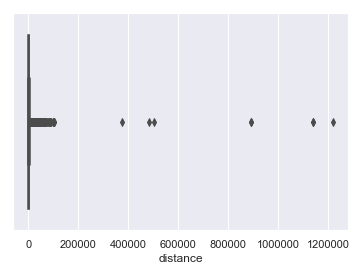

In [67]:
import seaborn as sns
sns.boxplot(data.distance)

In [68]:
data[data['distance']>200000].shape

(8, 7)

In [69]:
data=data[data['distance']<200000]

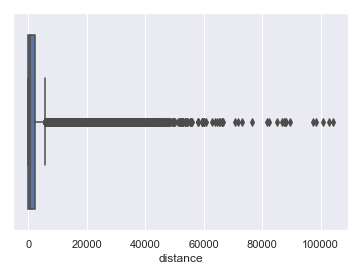

In [70]:
sns.boxplot(data.distance)

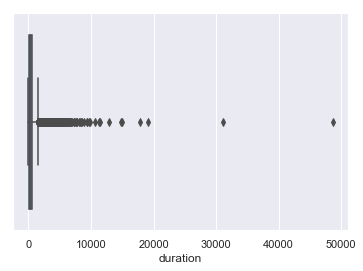

In [71]:
sns.boxplot(data.duration)

In [72]:
10000/3600

2.7777777777777777

In [73]:
data[data['duration']>10000].shape

(10, 7)

In [74]:
data=data[data['duration']<10000]

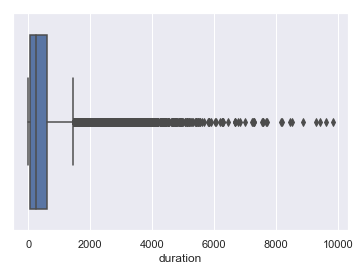

In [75]:
sns.boxplot(data.duration)

In [76]:
data.head(10)


city_id  distance  duration                    started_at  \
0    pentos      5384     857.0 2016-10-03 13:00:00.286999941   
1  volantis      1248     245.0 2016-10-03 13:00:00.852999926   
2    pentos      5847    1249.0 2016-10-03 13:00:01.670000076   
3    bravos      2585     471.0 2016-10-03 13:00:01.841000080   
4    pentos       743     182.0 2016-10-03 13:00:01.970000029   
5  volantis      1351     599.0 2016-10-03 13:00:02.154000044   
6  volantis      3297     529.0 2016-10-03 13:00:03.115000010   
7    pentos      7122    1042.0 2016-10-03 13:00:03.921999931   
8  volantis         3     157.0 2016-10-03 13:00:05.443000078   
9    bravos      2674    1525.0 2016-10-03 13:00:05.637000084   

                            trip_id                    type  \
0  c00cee6963e0dc66e50e271239426914  driving_to_destination   
1  427425e1f4318ca2461168bdd6e4fcbd         going_to_pickup   
2  757867f6d7c00ef92a65bfaa3895943f  driving_to_destination   
3  d09d1301d361f7359d0d936557d10f89         going_to_pickup   
4  00f20a701f0ec2519353ef3ffaf75068         going_to_pickup   
5  158e7bc8d42e1d8c94767b00c8f89568         going_to_pickup   
6  c15f71a8fd52740bc6b67cffba56a69e  driving_to_destination   
7  c6ce058a0bbac407fad2a60b1664bcf9  driving_to_destination   
8  5dd3c4847411305d51fc284cb43fe634       waiting_for_rider   
9  d3e6e8fb50c02d66feca2c60830c4fcc         going_to_pickup   

                         vehicle_id  
0  52d38cf1a3240d5cbdcf730f2d9a47d6  
1  8336b28f24c3e7a1e3d582073b164895  
2  8885c59374cc539163e83f01ed59fd16  
3  81b63920454f70b6755a494e3b28b3a7  
4  b73030977cbad61c9db55418909864fa  
5  126e868fb282852c2fa95d88878686bf  
6  355d17be3dbb7627043713927f04bb54  
7  954c713a1319ee16265510ef5b458d35  
8  53de469711d42b6cd115a57c9e774ae7  
9  b0906e917dc5cc0bcba190fd80079a74

In [77]:
data['segment']=np.where(data['trip_id'].str.startswith(('0', '1','2','3','4','5','6','7','8'))==True, 'road','linear')

In [78]:
data.head(10)

city_id  distance  duration                    started_at  \
0    pentos      5384     857.0 2016-10-03 13:00:00.286999941   
1  volantis      1248     245.0 2016-10-03 13:00:00.852999926   
2    pentos      5847    1249.0 2016-10-03 13:00:01.670000076   
3    bravos      2585     471.0 2016-10-03 13:00:01.841000080   
4    pentos       743     182.0 2016-10-03 13:00:01.970000029   
5  volantis      1351     599.0 2016-10-03 13:00:02.154000044   
6  volantis      3297     529.0 2016-10-03 13:00:03.115000010   
7    pentos      7122    1042.0 2016-10-03 13:00:03.921999931   
8  volantis         3     157.0 2016-10-03 13:00:05.443000078   
9    bravos      2674    1525.0 2016-10-03 13:00:05.637000084   

                            trip_id                    type  \
0  c00cee6963e0dc66e50e271239426914  driving_to_destination   
1  427425e1f4318ca2461168bdd6e4fcbd         going_to_pickup   
2  757867f6d7c00ef92a65bfaa3895943f  driving_to_destination   
3  d09d1301d361f7359d0d936557d10f89         going_to_pickup   
4  00f20a701f0ec2519353ef3ffaf75068         going_to_pickup   
5  158e7bc8d42e1d8c94767b00c8f89568         going_to_pickup   
6  c15f71a8fd52740bc6b67cffba56a69e  driving_to_destination   
7  c6ce058a0bbac407fad2a60b1664bcf9  driving_to_destination   
8  5dd3c4847411305d51fc284cb43fe634       waiting_for_rider   
9  d3e6e8fb50c02d66feca2c60830c4fcc         going_to_pickup   

                         vehicle_id segment  
0  52d38cf1a3240d5cbdcf730f2d9a47d6  linear  
1  8336b28f24c3e7a1e3d582073b164895    road  
2  8885c59374cc539163e83f01ed59fd16    road  
3  81b63920454f70b6755a494e3b28b3a7  linear  
4  b73030977cbad61c9db55418909864fa    road  
5  126e868fb282852c2fa95d88878686bf    road  
6  355d17be3dbb7627043713927f04bb54  linear  
7  954c713a1319ee16265510ef5b458d35  linear  
8  53de469711d42b6cd115a57c9e774ae7    road  
9  b0906e917dc5cc0bcba190fd80079a74  linear

In [86]:
#duration per meter
data['durationpermeter']=round(data.duration/data.distance,3)

In [87]:
data.head()

city_id  distance  duration                    started_at  \
0    pentos      5384     857.0 2016-10-03 13:00:00.286999941   
1  volantis      1248     245.0 2016-10-03 13:00:00.852999926   
2    pentos      5847    1249.0 2016-10-03 13:00:01.670000076   
3    bravos      2585     471.0 2016-10-03 13:00:01.841000080   
4    pentos       743     182.0 2016-10-03 13:00:01.970000029   

                            trip_id                    type  \
0  c00cee6963e0dc66e50e271239426914  driving_to_destination   
1  427425e1f4318ca2461168bdd6e4fcbd         going_to_pickup   
2  757867f6d7c00ef92a65bfaa3895943f  driving_to_destination   
3  d09d1301d361f7359d0d936557d10f89         going_to_pickup   
4  00f20a701f0ec2519353ef3ffaf75068         going_to_pickup   

                         vehicle_id segment  durationpermeter  
0  52d38cf1a3240d5cbdcf730f2d9a47d6  linear             0.159  
1  8336b28f24c3e7a1e3d582073b164895    road             0.196  
2  8885c59374cc539163e83f01ed59fd16    road             0.214  
3  81b63920454f70b6755a494e3b28b3a7  linear             0.182  
4  b73030977cbad61c9db55418909864fa    road             0.245

In [138]:
pickup=data[data['type']=='going_to_pickup']
pickup.head()

city_id  distance  duration                    started_at  \
1  volantis      1248     245.0 2016-10-03 13:00:00.852999926   
3    bravos      2585     471.0 2016-10-03 13:00:01.841000080   
4    pentos       743     182.0 2016-10-03 13:00:01.970000029   
5  volantis      1351     599.0 2016-10-03 13:00:02.154000044   
9    bravos      2674    1525.0 2016-10-03 13:00:05.637000084   

                            trip_id             type  \
1  427425e1f4318ca2461168bdd6e4fcbd  going_to_pickup   
3  d09d1301d361f7359d0d936557d10f89  going_to_pickup   
4  00f20a701f0ec2519353ef3ffaf75068  going_to_pickup   
5  158e7bc8d42e1d8c94767b00c8f89568  going_to_pickup   
9  d3e6e8fb50c02d66feca2c60830c4fcc  going_to_pickup   

                         vehicle_id segment  durationpermeter  
1  8336b28f24c3e7a1e3d582073b164895    road             0.196  
3  81b63920454f70b6755a494e3b28b3a7  linear             0.182  
4  b73030977cbad61c9db55418909864fa    road             0.245  
5  126e868fb282852c2fa95d88878686bf    road             0.443  
9  b0906e917dc5cc0bcba190fd80079a74  linear             0.570

In [139]:
#no waiting time means that the vehicle was there already. we do not need this for our analysis
pickup=pickup[pickup['durationpermeter']>0.0001]

In [141]:
pickup.shape

(58176, 9)

In [142]:
pickup=pickup.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [143]:
#durationpermeter - if a car goes 120km/h that would be 0.03. So everything below that is an error
pickup=pickup[pickup['durationpermeter']>0.03]


In [144]:
pickup.head()

city_id  distance  duration                    started_at  \
1  volantis      1248     245.0 2016-10-03 13:00:00.852999926   
3    bravos      2585     471.0 2016-10-03 13:00:01.841000080   
4    pentos       743     182.0 2016-10-03 13:00:01.970000029   
5  volantis      1351     599.0 2016-10-03 13:00:02.154000044   
9    bravos      2674    1525.0 2016-10-03 13:00:05.637000084   

                            trip_id             type  \
1  427425e1f4318ca2461168bdd6e4fcbd  going_to_pickup   
3  d09d1301d361f7359d0d936557d10f89  going_to_pickup   
4  00f20a701f0ec2519353ef3ffaf75068  going_to_pickup   
5  158e7bc8d42e1d8c94767b00c8f89568  going_to_pickup   
9  d3e6e8fb50c02d66feca2c60830c4fcc  going_to_pickup   

                         vehicle_id segment  durationpermeter  
1  8336b28f24c3e7a1e3d582073b164895    road             0.196  
3  81b63920454f70b6755a494e3b28b3a7  linear             0.182  
4  b73030977cbad61c9db55418909864fa    road             0.245  
5  126e868fb282852c2fa95d88878686bf    road             0.443  
9  b0906e917dc5cc0bcba190fd80079a74  linear             0.570

In [180]:
pickup['hour']=pickup.started_at.dt.hour

In [181]:
pickup.head()

city_id  distance  duration                    started_at  \
1  volantis      1248     245.0 2016-10-03 13:00:00.852999926   
3    bravos      2585     471.0 2016-10-03 13:00:01.841000080   
4    pentos       743     182.0 2016-10-03 13:00:01.970000029   
5  volantis      1351     599.0 2016-10-03 13:00:02.154000044   
9    bravos      2674    1525.0 2016-10-03 13:00:05.637000084   

                            trip_id             type  \
1  427425e1f4318ca2461168bdd6e4fcbd  going_to_pickup   
3  d09d1301d361f7359d0d936557d10f89  going_to_pickup   
4  00f20a701f0ec2519353ef3ffaf75068  going_to_pickup   
5  158e7bc8d42e1d8c94767b00c8f89568  going_to_pickup   
9  d3e6e8fb50c02d66feca2c60830c4fcc  going_to_pickup   

                         vehicle_id segment  durationpermeter  hour  
1  8336b28f24c3e7a1e3d582073b164895    road             0.196    13  
3  81b63920454f70b6755a494e3b28b3a7  linear             0.182    13  
4  b73030977cbad61c9db55418909864fa    road             0.245    13  
5  126e868fb282852c2fa95d88878686bf    road             0.443    13  
9  b0906e917dc5cc0bcba190fd80079a74  linear             0.570    13

In [205]:
pickup=pickup[(pickup['hour']== 17) | (pickup['hour']== 18)]

In [206]:
# goal is to reduce pickup time
pickup.groupby('segment').agg({'durationpermeter':'mean'})

durationpermeter
segment                  
linear           0.909607
road             1.034516

In [207]:
pickup.groupby(['city_id','segment']).agg({'durationpermeter':'mean'})

durationpermeter
city_id  segment                  
bravos   linear           0.421917
         road             1.070264
pentos   linear           0.974540
         road             1.065134
volantis linear           0.908171
         road             0.894977

Conclusion1: The goal we were trying to achieve was to decrease the duration per meter to the pick-up station. In Bravos and Pentos the used dataset did not show me any decrease of the Duration per meter. I will now loo at Volatnis, if we see a significant decrease in this city.

In [208]:
pickup[pickup['city_id']=='volantis'].shape

(1640, 10)

In [209]:
volantis=pickup[pickup['city_id']=='volantis']

In [210]:
volantis_road_dpm=volantis[volantis['segment']=='road'].durationpermeter

In [211]:
volantis_linear_mean=volantis[volantis['segment']=='linear'].durationpermeter.mean()

In [212]:
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

tset,pval=ttest_1samp(volantis_road_dpm,volantis_linear_mean)
print(pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

0.9052537528288742
we are accepting null hypothesis


# Conclussion

Conclussion:
As we accept the null hypothesis, we do not see any significant decrease in Duration per meter by using the road distance. Therefore I would not recommend to move towards road distance. 

But I guess the experimental design needs to optimised to make a right conclussion. We need collect data only in a particular timeframe that can be broken down to several parts of the city. Because if a driver uses the highway often to pick someone up, it can not be compared with the data collected in the city during rush hour. Therefore I recommend to collect data during rush hour in 1 city from different parts of the city. 